place for installation

In [1]:
!py -m pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


place for library

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import PIL
import tensorflow as tf 
import pathlib

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data load and analitycs

In [4]:
# urlretrieve("https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip")
# # !unzip rockpaperscissors.zip

In [5]:
dir_image = pathlib.Path('rockpaperscissors')
image_count = len(list(dir_image.glob('*/*.png')))
image_count

2188

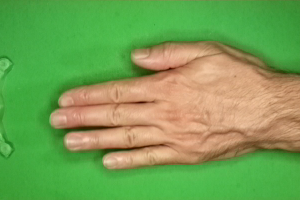

In [6]:
paper = list(dir_image.glob('paper/*'))
PIL.Image.open(str(paper[0]))

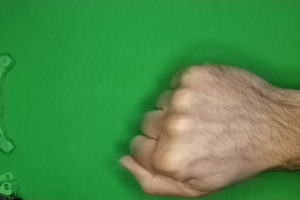

In [7]:
rock = list(dir_image.glob('rock/*'))
PIL.Image.open(str(rock[0]))

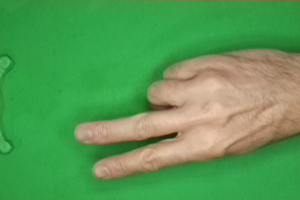

In [8]:
scissors = list(dir_image.glob('scissors/*'))
PIL.Image.open(str(scissors[0]))

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_dir = tf.keras.utils.image_dataset_from_directory(
    dir_image,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    subset='training',
    validation_split=0.2
)

Found 2188 files belonging to 3 classes.


Using 1751 files for training.


In [11]:
val_dir = tf.keras.utils.image_dataset_from_directory(
    dir_image,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    subset='validation',
    validation_split=0.2
)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


In [12]:
class_names = train_dir.class_names
class_names
# val_dir.class_names
# train_dir.take(1)


['paper', 'rock', 'scissors']

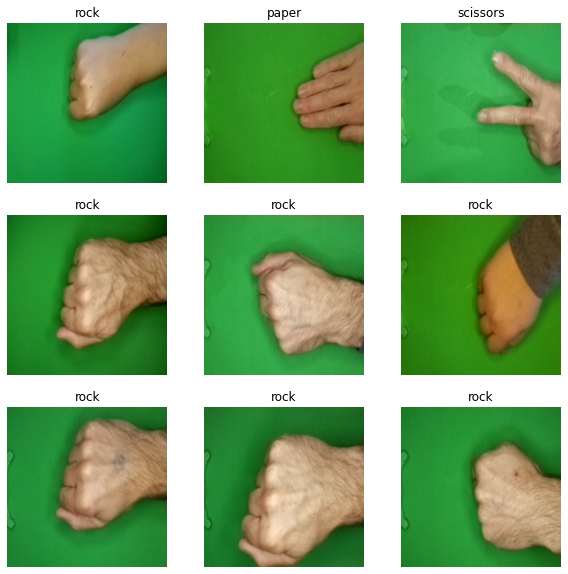

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_dir.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

Preprocessing

In [14]:
autotune_size = tf.data.AUTOTUNE
train_dir = train_dir.cache().shuffle(1000).prefetch(buffer_size=autotune_size)
val_dir = val_dir.cache().prefetch(buffer_size=autotune_size)

In [21]:
normalization = layers.Rescaling(1./255)
train_normaliz = train_dir.map(lambda x, y: (normalization(x), y))
train_image, train_label = next(iter(train_normaliz))
firstly_img = train_image[0]
print(np.min(firstly_img), np.max(firstly_img))

0.0 0.8740741


In [16]:
# def predict_uploaded_image(model, uploaded_image_path, class_labels):
#     img = image.load_img(uploaded_image_path, target_size=(128, 128))  # Sesuaikan dengan target size model
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0
#     prediction = model.predict(img_array)
#     predicted_class = class_labels[np.argmax(prediction)]

#     return predicted_class

In [17]:
# class_labels = ['paper', 'rock', 'scissors']

In [18]:
# uploaded = files.upload()

In [19]:
# for fn in uploaded.keys():
#     predicted_class = predict_uploaded_image(model, fn, class_labels)
#     img = image.load_img(fn)
#     plt.imshow(img)
#     plt.show()
#     print(f'The predicted class for {fn} is: {predicted_class}')

In [20]:
# import numpy as np
# np.asanyarray({1,2,3,4})